Epoch 1/10
7121/7121 [==============================] - 7s 873us/step - loss: 0.6444 - val_loss: 0.5496
Epoch 2/10
7121/7121 [==============================] - 6s 883us/step - loss: 0.5296 - val_loss: 0.5162
Epoch 3/10
7121/7121 [==============================] - 6s 845us/step - loss: 0.5055 - val_loss: 0.4961
Epoch 4/10
7121/7121 [==============================] - 6s 838us/step - loss: 0.4899 - val_loss: 0.5007
Epoch 5/10
7121/7121 [==============================] - 6s 830us/step - loss: 0.4778 - val_loss: 0.4685
Epoch 6/10
7121/7121 [==============================] - 6s 810us/step - loss: 0.4654 - val_loss: 0.4583
Epoch 7/10
7121/7121 [==============================] - 6s 855us/step - loss: 0.4576 - val_loss: 0.4553
Epoch 8/10
7121/7121 [==============================] - 6s 860us/step - loss: 0.4524 - val_loss: 0.4487
Epoch 9/10
7121/7121 [==============================] - 6s 866us/step - loss: 0.4472 - val_loss: 0.4456
Epoch 10/10
1781/1781 [==============================] - 1s 552u

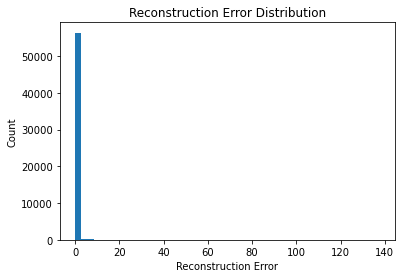

Accuracy: 0.994399775288789


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Split the data into features and labels
X = data.drop("Class", axis=1).values
y = data["Class"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Autoencoder model
model = Sequential()
model.add(Dense(16, input_shape=(X_train.shape[1],), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(X_train.shape[1]))

# Compile the model
model.compile(optimizer="adam", loss="mse")

# Train the model
history = model.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

# Predict the reconstructed samples
reconstructed = model.predict(X_test)

# Compute the reconstruction error
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)

# Plot the reconstruction error distribution
plt.hist(mse, bins=50)
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.title("Reconstruction Error Distribution")
plt.show()

# Set a threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)

# Classify the samples as normal or anomaly
predictions = np.where(mse > threshold, 1, 0)

# Evaluate the model
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)
